In [1]:
# Code in file autograd/two_layer_net_autograd.py
import torch

device = torch.device('cpu')
# device = torch.device('cuda') # Uncomment this to run on GPU

In [2]:
import numpy as np

In [3]:
ff = 1
N = 100 # input dimension and number of training behaviors
M = N # output dimension
R = N**ff # hidden dimension

# f_threshold = 0.4 # threshold for nonlinear binary rounding 
comb_on = 5 # number of motors turned on for each label
#learning_rate = 20

In [57]:
# Define nonlinear activation function
def f(x): # nonlinear conversion function to binary
    return x.sigmoid()#tanh().add(1).div(2)

In [4]:
# Create input data
x_np = np.array([[1 if i ==j else 0 for i in range(N)] for j in range(N)])
x = torch.tensor(x_np, device=device).float()

In [5]:
# Create output data
#one_frac = [0.125, 0.25, 0.375, 0.5]
def y_seq_ones():
    return np.random.choice(np.arange(N), size= comb_on, replace = False)
y_ones_all = [y_seq_ones() for i in range(N)]
y_np = np.array([tuple([1 if i in y_ones_all[j] else 0 for i in range(N)]) for j in range(N)])
y = torch.tensor(y_np, device=device).float()

In [6]:
# Check that there are no duplicate sequences
y_tup = [tuple(x) for x in y_np]
len(set(y_tup))

100

In [13]:
x_np[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
def y_seq_ones():
    return np.random.choice(np.arange(N), size= comb_on, replace = False)

for i in range(10):
    y_ones_all = [y_seq_ones() for i in range(N)]
    y_np = np.array([tuple([1 if i in y_ones_all[j] else 0 for i in range(N)]) for j in range(N)])
    y = torch.tensor(y_np, device=device).float()

    np.savetxt('k_5_behaviors/x_{}.csv'.format(i), np.array(x), delimiter=',') 

    np.savetxt('k_5_behaviors/y_{}.csv'.format(i), np.array(y), delimiter=',') 

# from numpy import genfromtxt
# my_data = genfromtxt('k_5_behaviors/x_{}.csv'.format(i), delimiter=',')
# my_data = genfromtxt('k_5_behaviors/y_{}.csv'.format(i), delimiter=',')

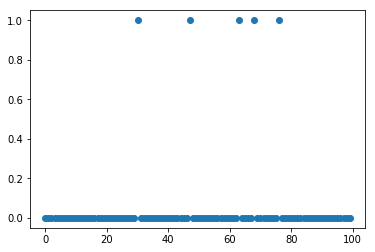

In [15]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.array(my_data[0, :]), 'o')
plt.show()

In [92]:
# Create output data
one_frac = [0.5, 0.75]
loss_f1 = []
for f1 in one_frac[:]:
    def y_seq_ones():
        return np.random.choice(np.arange(N), size= int(N*f1), replace = False)
    y_ones_all = [y_seq_ones() for i in range(N)]
    y_np = np.array([tuple([1 if i in y_ones_all[j] else 0 for i in range(N)]) for j in range(N)])
    y = torch.tensor(y_np, device=device).float()

    # Create random Tensors for weights; setting requires_grad=True means that we
    # want to compute gradients for these Tensors during the backward pass.
    w1 = torch.randn(N, R, device=device, requires_grad=True).float()
    w2 = torch.randn(R, M, device=device, requires_grad=True).float()
    
    ## initialize tensor variables for bias terms 
    b1 = torch.randn(1, R, device=device, requires_grad=True).float()# bias for hidden layer
    b2 = torch.randn(1, M, device=device, requires_grad=True).float() # bias for output layer

    t = 0
    loss = 1000
    loss_all = []
    while t < 5000:
      # Forward pass: compute predicted y using operations on Tensors. Since w1 and
      # w2 have requires_grad=True, operations involving these Tensors will cause
      # PyTorch to build a computational graph, allowing automatic computation of
      # gradients. Since we are no longer implementing the backward pass by hand we
      # don't need to keep references to intermediate values.
      y_pred = f(f(x.mm(w1).add(b1)).mm(w2).add(b2))

      # Compute and print loss. Loss is a Tensor of shape (), and loss.item()
      # is a Python number giving its value.
      loss = (y_pred - y).pow(2).mean()
      loss_all.append(loss.item())
      print(t, loss.item())

      # Use autograd to compute the backward pass. This call will compute the
      # gradient of loss with respect to all Tensors with requires_grad=True.
      # After this call w1.grad and w2.grad will be Tensors holding the gradient
      # of the loss with respect to w1 and w2 respectively.
      loss.backward()

      # Update weights using gradient descent. For this step we just want to mutate
      # the values of w1 and w2 in-place; we don't want to build up a computational
      # graph for the update steps, so we use the torch.no_grad() context manager
      # to prevent PyTorch from building a computational graph for the updates
      with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad

        # Manually zero the gradients after running the backward pass
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        t = t + 1
    loss_f1.append(loss_all)

0 0.29326242208480835
1 0.292106956243515
2 0.29098254442214966
3 0.28988727927207947
4 0.28881970047950745
5 0.28777846693992615
6 0.28676241636276245
7 0.28577062487602234
8 0.28480175137519836
9 0.28385525941848755
10 0.28293049335479736
11 0.2820265591144562
12 0.2811428904533386
13 0.2802790105342865
14 0.27943429350852966
15 0.27860844135284424
16 0.2778008282184601
17 0.27701127529144287
18 0.2762393355369568
19 0.27548453211784363
20 0.2747466266155243
21 0.2740253508090973
22 0.2733203172683716
23 0.27263128757476807
24 0.27195796370506287
25 0.2713000178337097
26 0.2706572413444519
27 0.2700294554233551
28 0.2694162130355835
29 0.26881733536720276
30 0.26823264360427856
31 0.26766180992126465
32 0.2671046257019043
33 0.2665609121322632
34 0.2660304307937622
35 0.26551273465156555
36 0.26500797271728516
37 0.26451560854911804
38 0.2640356123447418
39 0.263567715883255
40 0.26311156153678894
41 0.26266714930534363
42 0.26223424077033997
43 0.2618125379085541
44 0.26140195131301

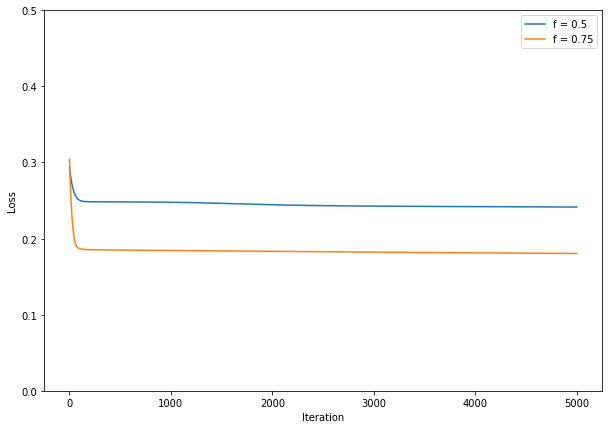

In [93]:
# 1 hidden neuron

import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
for i, l in enumerate(loss_f1):
    plt.plot(np.array(l), label = 'f = {}'.format(one_frac[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

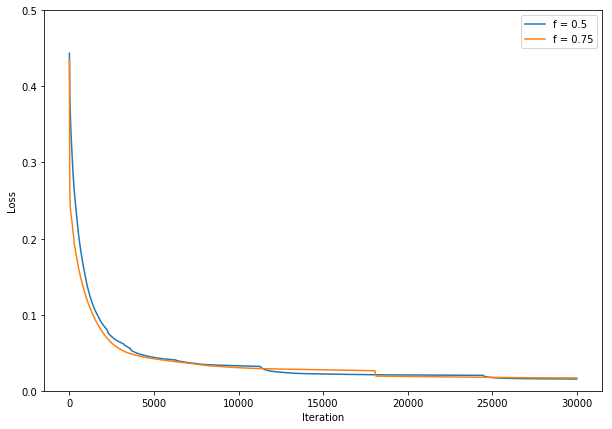

In [89]:
# N hidden neuron

import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
for i, l in enumerate(loss_f1):
    plt.plot(np.array(l), label = 'f = {}'.format(one_frac[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

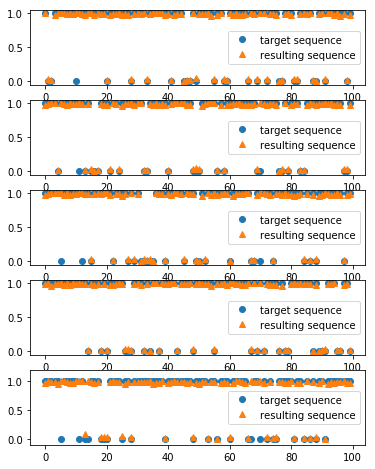

In [90]:
import matplotlib
from matplotlib import pyplot as plt
N_plot = 5
fig, ax = plt.subplots(N_plot, 1)
fig.set_figheight(8)
for i in range(N_plot):
    ax[i].plot(y_np[i], 'o', label = 'target sequence')
    ax[i].plot(y_pred[i].detach().numpy(), '^', label = 'resulting sequence')
    ax[i].legend()
    plt.ylim([-0.1, 1.2])

plt.show()

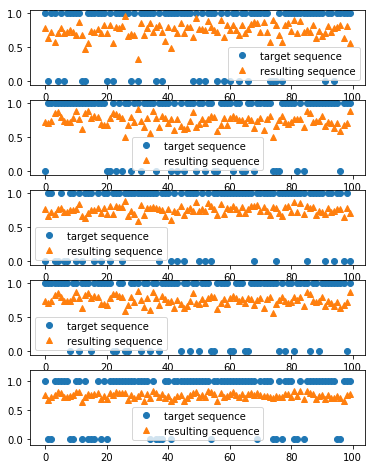

In [94]:
import matplotlib
from matplotlib import pyplot as plt
N_plot = 5
fig, ax = plt.subplots(N_plot, 1)
fig.set_figheight(8)
for i in range(N_plot):
    ax[i].plot(y_np[i], 'o', label = 'target sequence')
    ax[i].plot(y_pred[i].detach().numpy(), '^', label = 'resulting sequence')
    ax[i].legend()
    plt.ylim([-0.1, 1.2])

plt.show()